В этом проекте генерируется датасет, состоящий из разного рода переменных (их описание есть в разделе "Переменные и связь между ними"): бинарных и непрерывных, которые задаются с помощью разного рода распределений. Далее решаются задачи классификации и регрессии на ряде моделей, после происходит тюнинг гиперпараметров выбранных моделей для улучшения качества.

# Установка библиотек

In [2]:
!pip install bnlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.8 MB/s eta 0:00:00
   ━━━━

In [3]:
!pip install doubleml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.9/342.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 66.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [13]:
# Подключим необходимые библиотеки

import pandas as pd
from copy import deepcopy
import math
import scipy.stats
import matplotlib.pyplot as plt
import networkx as nx
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import RocCurveDisplay               # ROC-кривая
from sklearn import metrics                               # метрики точности
import itertools
from sklearn.ensemble import RandomForestClassifier       # случайный лес (классификация)
from sklearn.ensemble import RandomForestRegressor        # случайный лес (регрессия)
from sklearn import tree                                  # решающие деревья
from sklearn.inspection import permutation_importance     # перестановочная важность
from scipy.stats import rankdata                          # ранжирование элементов
from sklearn.ensemble import BaggingClassifier            # бэггинг
from copy import deepcopy                                 # копирование объектов
from sklearn.linear_model import LinearRegression         # копирование объектов
from sklearn.ensemble import GradientBoostingClassifier   # градиентный бустинг (классификация)
from sklearn.ensemble import GradientBoostingRegressor    # градиентный бустинг (регрессия)
from sklearn.linear_model import LogisticRegression       # логистическая регрессия
import math
from sklearn.model_selection import GridSearchCV          # подбор гиперпараметров
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix, roc_auc_score, RocCurveDisplay, roc_curve
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB
import bnlearn
import statsmodels.api as sm
import doubleml as dml

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import randint, uniform
from scipy.stats import (
    norm,
    gamma,
    t,
    expon

)
import seaborn

In [14]:
import numpy as np

In [129]:
from sklearn.model_selection import RandomizedSearchCV

# Переменные и связь между ними

Целевая переменная - ожидаемая продолжительность жизни,  LE .

Переменная воздействия - факт ведения здорового образа жизни,  Lifestylei  (1 - ведется ЗОЖ, 0 - не ведется ЗОЖ).

Инструментальная переменная - факт ведения здорового образа жизни родителями,  Parentsi  (1 - ведется ЗОЖ, 0 - не ведется ЗОЖ).

Контрольные переменные:

Wage  - заработная плата в тыс. рублей.
Cityi  - факт проживания в городе (1 - живет в городе, 0 - живет не в городе).
Diseasei  - наличие хронических заболеваний (1 - есть, 0 - нет).

Ненаблюдаемая переменная, порождающие эндогенность:
Health  - генетически обусловленная "крепость" здоровья.

In [7]:
# Стиль отображения графика
nx_options = {
    "node_color": "white",
    "node_size": 2000,
    "width": 3,
    "arrowstyle": "-|>",
    "arrowsize": 12,
}

# Связи
edges = [
    ("Lifestyle", "LE"),  # (откуда стрелочка, куда стрелочка)
    ("Wage", "LE"),
    ("City", "LE"),
    ("Disease", "LE"),
    ("Health", "LE"),
    ("Health", "Lifestyle"),
    ("Parents", "Lifestyle"),
]

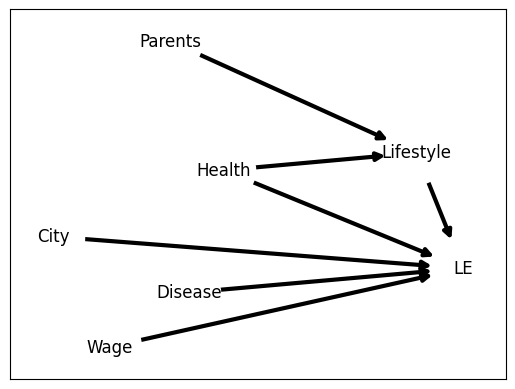

In [8]:
# Инициализируем граф
G = nx.DiGraph(directed=True)
G.add_edges_from(edges)

# Отображаем граф
np.random.seed(8)
nx.draw_networkx(G, arrows=True, **nx_options)

In [9]:
import pandas as pd

# Генерация


In [10]:
# Для воспроизводимости
np.random.seed(34)


# Число наблюдений
n = 10000

### Контрольная переменная Wage

In [16]:
# Предположим, что распределение опыта работы схоже с нормальным
wage = norm.rvs(size=n, loc=60, scale=20)

# Для красоты ограничим минимальные и максимальные значения
wage[wage >= 170] = 170
wage[wage <= 10] = 10

# Также, для удобства введем округление
wage = np.round(wage, 2)

In [17]:
# Посмотрим на несколько первых значений
print(wage[0:10])

[63.3  46.01 91.23 83.78 46.8  47.42 48.95 72.78 82.73 67.85]


<Axes: ylabel='Density'>

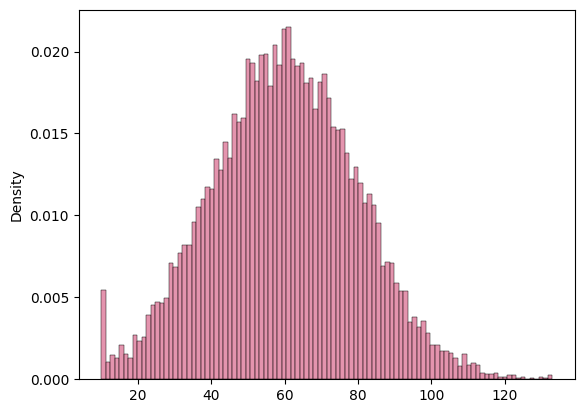

In [18]:
# Посмотрим на распределение
seaborn.histplot(
    wage,  # данные
    stat="density",  # тип гистограммы
    color="palevioletred",  # цвет гистограммы
    label="histogram",  # наименование гистограммы
    bins=100,
)  # число столбиков в Гистограмме

### Бинарные контрольные переменные City, Disease

In [19]:
# Сгенерируем переменную на факт проживания в городе
city = np.random.binomial(n=1, p=0.7, size=n)



In [20]:
# Сгенерируем переменную характеризующую хронических больных
disease = np.random.binomial(n=1, p=0.15, size=n)




### Ненаблюдаемая переменная Health

In [21]:
# Генерируем "крепость" здоровья для жителей России от 19 до 65 лет

# Параметры гамма-распределения
shape = 30  # Параметр формы (k)
scale = 2  # Параметр масштаба (θ)

# Генерация экспериментальных данных
sample_size = n  # Размер выборки
health = gamma.rvs(a=shape, scale=scale, size=n)

idx_change = health > 100
health[idx_change] = np.random.uniform(0, 100, np.sum(idx_change))


# Посмотрим на несколько первых значений
print(health[0:10])

[65.40671104 75.53538138 68.64900823 52.83726889 49.4221489  62.86312752
 61.17849757 54.36881377 47.29428642 56.77796791]


<Axes: ylabel='Density'>

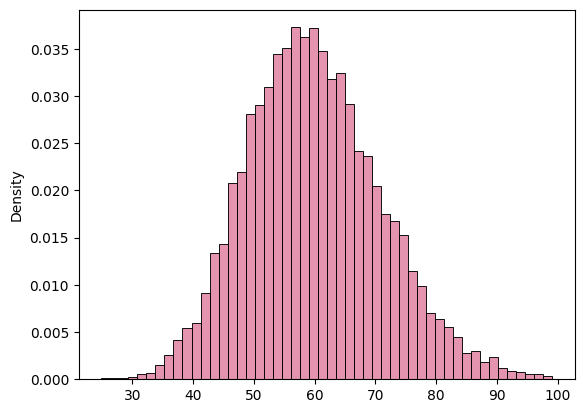

In [22]:
# Посмотрим на распределение здоровья
seaborn.histplot(
    health,  # данные
    stat="density",  # тип гистограммы
    color="palevioletred",  # цвет гистограммы
    label="histogram",  # наименование гистограммы
    bins=50,
)  # число столбиков в Гистограмме

### Инструментальная переменная Parents

In [23]:
# Сформируем индекс
parents_index = 0.2 * wage / (6 - city + 3 * disease) - 3

In [24]:
# Создадим условные вероятности
parents_prob = norm.cdf(parents_index)

# Посмотрим на несколько первых условных вероятностей
print(parents_prob[0:10])

[0.18673294 0.07127875 0.74189544 0.63728084 0.12965996 0.13497016
 0.08560388 0.46462043 0.6214153  0.06782045]


In [25]:
# Сгенерируем ведение ЗОЖ у родителей
parents = np.random.binomial(n = 1, p = parents_prob, size = n)

# Посмотрим на несколько сгенерированных значений
print(parents[0:10])

[0 0 1 1 0 0 0 0 0 0]


In [26]:
# Дисперсия индекса (отличается от 1 не более чем в 2 раза)
print(np.var(parents_index))

0.6360856561786588


In [27]:
# Доля родителей, ведущих ЗОЖ
print(np.mean(parents))

0.2564


### Переменная воздействия Lifestyle

In [28]:
# Равномерные случайные величины
u = uniform.rvs(size = n)

In [29]:
# Сгенерируем часть индекса, не зависящую от ведением родителями ЗОЖ
lifestyle_index = 0.1 / np.log(disease + 2) +  np.sqrt(wage) + 0.06 * health - 11
print(lifestyle_index[0:10])

[ 1.02480188  0.45945954  2.81464968  1.46764717 -1.04934901 -0.19772472
 -0.18859298  0.93751783  1.07753002  0.73481314]


In [30]:
# Симулируем ведение индивидами ЗОЖ в случае,
# когда их родители ведут ЗОЖ
parents1    = 1
lifestyle1_index = lifestyle_index +  parents1 - 0.7
lifestyle1_prob  = norm.cdf(lifestyle1_index)
lifestyle1       = (lifestyle1_prob >= u).astype(int)

# Доля людей, ведущих ЗОЖ, в случае, когда у всех есть
# родители, ведущие ЗОЖ
np.mean(lifestyle1)

np.float64(0.6598)

In [31]:
# Симулируем ведение индивидами ЗОЖ в случае,
# когда их родители не ведут ЗОЖ
parents0    = 0
lifestyle0_index = lifestyle_index +  parents0 - 1.7
lifestyle0_prob  = norm.cdf(lifestyle0_index)
lifestyle0       = (lifestyle0_prob >= u).astype(int)

# Доля людей, ведущих ЗОЖ, в случае, когда у всех есть
# родители, ведущие ЗОЖ
np.mean(lifestyle0)

np.float64(0.2316)

In [32]:
# факт ведения индивидами ЗОЖ
lifestyle = lifestyle0 * (1 - parents) + lifestyle1 * parents

In [33]:
# Доля индивидов, ведущих ЗОЖ
print(np.mean(lifestyle))

0.3457


In [34]:
# Рассмотрим корреляции, их модули должны быть в диапазоне от 0.2 до 0.8
print(pd.DataFrame(data    = [np.corrcoef(lifestyle, health)[0, 1],
                              np.corrcoef(lifestyle, parents)[0, 1]],
                   index   = ['Corr(lifestyle, health)',
                              'Corr(lifestyle, parents)'],
                   columns = ['Оценка']))

                            Оценка
Corr(lifestyle, health)   0.219111
Corr(lifestyle, parents)  0.612339


Найдем статистики для непрерывных переменных

Для переменной Health

In [35]:
statistics = {
    "Выборочное среднее": np.mean(health),
    "Выборочное стандартное отклонение": np.std(health),
    "Медиана": np.median(health),
    "Минимум": np.min(health),
    "Максимум": np.max(health)
}

df = pd.DataFrame(list(statistics.items()), columns=['Статистика', 'Значение'])

# Вывод таблицы
print(df)

                          Статистика   Значение
0                 Выборочное среднее  59.902742
1  Выборочное стандартное отклонение  11.007261
2                            Медиана  59.202923
3                            Минимум  24.893086
4                           Максимум  99.086254


Для переменной Wage

In [36]:
statistics = {
    "Выборочное среднее": np.mean(wage),
    "Выборочное стандартное отклонение": np.std(wage),
    "Медиана": np.median(wage),
    "Минимум": np.min(wage),
    "Максимум": np.max(wage)
}

df = pd.DataFrame(list(statistics.items()), columns=['Статистика', 'Значение'])

# Вывод таблицы
print(df)

                          Статистика    Значение
0                 Выборочное среднее   59.989024
1  Выборочное стандартное отклонение   19.800860
2                            Медиана   59.930000
3                            Минимум   10.000000
4                           Максимум  132.910000


Теперь найдем статистики бинарных переменных

Для переменной Parents

In [37]:
statistics = {
    "Количество единиц": np.sum(parents),
    "Доля единиц": np.sum(parents)/len(parents)
    }

df = pd.DataFrame(list(statistics.items()), columns=['Статистика', 'Значение'])

# Вывод таблицы
print(df)

          Статистика   Значение
0  Количество единиц  2564.0000
1        Доля единиц     0.2564


Для переменной City

In [38]:
statistics = {
    "Количество единиц": np.sum(city),
    "Доля единиц": np.sum(city)/len(city)
    }

df = pd.DataFrame(list(statistics.items()), columns=['Статистика', 'Значение'])

# Вывод таблицы
print(df)

          Статистика  Значение
0  Количество единиц  7070.000
1        Доля единиц     0.707


Для переменной Disease

In [39]:
statistics = {
    "Количество единиц": np.sum(disease),
    "Доля единиц": np.sum(disease)/len(disease)
    }

df = pd.DataFrame(list(statistics.items()), columns=['Статистика', 'Значение'])

# Вывод таблицы
print(df)

          Статистика   Значение
0  Количество единиц  1488.0000
1        Доля единиц     0.1488


In [40]:
statistics = {
    "Количество единиц": np.sum(lifestyle),
    "Доля единиц": np.sum(lifestyle)/len(lifestyle)
    }

df = pd.DataFrame(list(statistics.items()), columns=['Статистика', 'Значение'])

# Вывод таблицы
print(df)

          Статистика   Значение
0  Количество единиц  3457.0000
1        Доля единиц     0.3457


### Целевая переменная LE

In [41]:
# Случайные ошибки
error0 = t.rvs(size = n, df = 10) * 2
error1 = expon.rvs(size = n, scale = 2) - 10

# Функция от контрольных переменных
  # когда индивид ведет ЗОЖ
g1_obs   = 60 + wage / (9 + disease + city)
g1_unobs =  0.25 * health
g1       = g1_obs + g1_unobs
  # когда индивид не ведет ЗОЖ
g0_obs   = 50 + wage / (9.5 + city + disease)
g0_unobs =  0.2 * health
g0       = g0_obs + g0_unobs

# Зарплата в зависимости от ведения ЗОЖ
LE0 = g0 + error0
LE1 = g1 + error1

# Наблюдаемая продолжительность жизни
LE = LE1 * lifestyle + LE0 * (1 - lifestyle)

In [42]:
# Приблизительно оценим адекватность дисперсий, они должны отличаться не более чем в 5 раз
print(pd.DataFrame(data    = [np.var(error0),   np.var(g0),
                              np.var(g0_obs),   np.var(g0_unobs),
                              np.var(error1),   np.var(g1),
                              np.var(g1_obs),   np.var(g1_unobs)],
                   index   = ['Var(eps0)',     'Var(g0)',
                              'Var(g0_obs)',   'Var(g0_unobs)',
                              'Var(eps1)',     'Var(g1)',
                              'Var(g1_obs)',   'Var(g1_unobs)'],
                   columns = ['Оценка']))

                  Оценка
Var(eps0)       4.902854
Var(g0)         8.627081
Var(g0_obs)     3.812763
Var(g0_unobs)   4.846391
Var(eps1)       3.959022
Var(g1)        11.756593
Var(g1_obs)     4.226782
Var(g1_unobs)   7.572487


In [43]:
statistics = {
    "Выборочное среднее": np.mean(LE),
    "Выборочное стандартное отклонение": np.std(LE),
    "Медиана": np.median(LE),
    "Минимум": np.min(LE),
    "Максимум": np.max(LE)
}

df = pd.DataFrame(list(statistics.items()), columns=['Статистика', 'Значение'])

# Вывод таблицы
print(df)

                          Статистика   Значение
0                 Выборочное среднее  69.701179
1  Выборочное стандартное отклонение   5.444439
2                            Медиана  68.867218
3                            Минимум  54.826583
4                           Максимум  94.706204


### Итоги

In [44]:
# Аггрегируем данные в датафрейм
df = pd.DataFrame({'LE': LE, 'lifestyle': lifestyle,
                   'wage': wage, 'disease': disease,
                   'city': city,'parents': parents,
                   'health': health})
df = df.loc[0:n, :]

# Посмотрим на симулированные данные
df.head(10).style.format(precision = 2)

,LE,lifestyle,wage,disease,city,parents,health
0,73.60,1,63.30,0,0,0,65.41
1,66.34,0,46.01,0,0,0,75.54
2,83.91,1,91.23,0,1,1,68.65
3,73.26,1,83.78,0,1,1,52.84
4,61.96,0,46.80,0,1,0,49.42
5,67.50,0,47.42,0,1,0,62.86
6,65.74,0,48.95,0,0,0,61.18
7,66.61,0,72.78,0,1,0,54.37
8,69.61,0,82.73,0,1,0,47.29
9,65.43,0,67.85,1,0,0,56.78


In [45]:

# Разделим целевую переменную и признаки
target = df.loc[:, ['lifestyle']]                     # целевая переменная
features = df.loc[:, df.columns.drop(['LE', 'lifestyle'])]
target = np.squeeze(target)

# Разделим выборку на обучающую и тестову
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.22, random_state = 7)

# Сохраним число наблюдений обучающей и тестовой выборок
n_train = len(target_train)
n_test  = len(target_test)

# Вернем исходную сортировку индексов
features_train = features_train.reset_index(drop = True)
target_train   = target_train.reset_index(drop = True)
features_test  = features_test.reset_index(drop = True)
target_test    = target_test.reset_index(drop = True)




# Классификация


### Метод ближайших соседей

In [46]:
# Метод ближайших соседей для прогнозирования переменной воздействия (ведение индивидом ЗОЖ - lifestyle)

# Сохраним данные до нормализации
features_train_initial = features_train.copy()
features_test_initial  = features_test.copy()

# Подготовим объект, осуществляющий нормализацию
scaler = sklearn.preprocessing.StandardScaler().set_output(transform = "pandas").fit(features_train)

# Нормализуем данные
features_train = scaler.transform(features_train_initial)  # обучающая выборка
features_test  = scaler.transform(features_test_initial)   # тестовая выборка

In [47]:
knn = KNeighborsClassifier(n_neighbors = 5,      # число соседей
                           metric = "minkowski", # метрика расстояния
                           p = 3)                # Евклидова метрика
knn.fit(features_train, target_train)            # обучение на данных

KNeighborsClassifier(p=3)

In [48]:
hyperparameters0_knn = {'n_neighbors': 5, 'p': 3}

In [49]:
# Оцениваем вероятности
prob_knn = knn.predict_proba(features_train)
print(prob_knn[0:10:, 0])                             # оценки P(Y = 0 | X = x)
print(prob_knn[0:10:, 1])                             # оценки P(Y = 1 | X = x)

[0.2 0.  0.8 1.  0.  1.  1.  1.  0.2 1. ]
[0.8 1.  0.2 0.  1.  0.  0.  0.  0.8 0. ]


In [50]:
# Прогнозы
prediction_knn = knn.predict(features_train)   # I(P(Y = 1 | X = x) > 0.5)
print(prediction_knn[0:10])

[1 1 0 0 1 0 0 0 1 0]


In [51]:
# Применим кросс-валидацию
ACC_CV_knn = cross_val_score(estimator = knn,     # модель
                            X = features_train,       # признаки
                            y = target_train,         # целевая переменная
                            cv = 5)             # количество частей (folds)
ACC_CV_total_knn = np.mean(ACC_CV_knn)            # средняя точность по фолдам

In [52]:
# Оценим точность
ACC_train_knn = knn.score(features_train, target_train)  # обучающая выборка
ACC_test_knn  = knn.score(features_test, target_test)    # тестовая выборка

# Посмотрим на результат
print(pd.DataFrame(data    = [ACC_train_knn, ACC_test_knn, ACC_CV_total_knn ],
                   index   = ['Обучающая выборка', 'Тестовая выборка', 'Кросс-валидация на обучающей выборке'],
                   columns = ['ACC']))

                                           ACC
Обучающая выборка                     0.890897
Тестовая выборка                      0.857727
Кросс-валидация на обучающей выборке  0.852564


### Градиентный бустинг

In [53]:
# Воспользуемся градиентным бустингом
learning_rate = 0.5
n_estimators  = 50
max_depth     = 2
random_state  = 123
max_features  = None
gb = GradientBoostingClassifier(loss = "log_loss",             # функция потерь
                                n_estimators = n_estimators,   # число деревьев
                                learning_rate = learning_rate, # скорость обучения
                                criterion = "friedman_mse",    # критерий деревьев
                                max_depth = max_depth,         # глубина деревьев
                                random_state = random_state,   # для воспроизводимости
                                max_features = max_features)   # признаки
gb.fit(features_train, target_train)                           # обучение

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=50,
                           random_state=123)

In [54]:
hyperparameters0_gb = {'learning_rate' : 0.5,
'n_estimators' : 50,
'max_depth' : 2}

In [55]:
# Оценим условные вероятности градиентным бустингом
gb_train = gb.predict_proba(features_train)[:, 1]
gb_test  = gb.predict_proba(features_test)[:, 1]

In [56]:
# Применим кросс-валидацию
ACC_CV_gb = cross_val_score(estimator = gb,     # модель
                            X = features_train,       # признаки
                            y = target_train,         # целевая переменная
                            cv = 5)             # количество частей (folds)
ACC_CV_total_gb = np.mean(ACC_CV_gb)            # средняя точность по фолдам



In [57]:
# Оценим точности
ACC_test_gb = gb.score(features_test, target_test)
ACC_train_gb = gb.score(features_train, target_train)
print(pd.DataFrame(data    = [ACC_train_gb, ACC_test_gb, ACC_CV_total_gb ],
                   index   = ['Обучающая выборка', 'Тестовая выборка', 'Кросс-валидация на обучающей выборке'],
                   columns = ['ACC тест']))

                                      ACC тест
Обучающая выборка                     0.887051
Тестовая выборка                      0.876364
Кросс-валидация на обучающей выборке  0.871154


### Логистическая регрессия

In [58]:
# Обучим логистическую регрессию
logit = LogisticRegression(penalty = 'l2', solver = 'lbfgs',
                           fit_intercept = True)
logit.fit(features_train, target_train)

LogisticRegression()

In [59]:
hyperparameters0_logit = {'penalty': 'l2', 'solver': 'lbfgs'}

In [60]:
# Оценки условных вероятностей
prob_logit = logit.predict_proba(features_train)[:, 1]
print(prob_logit[0:10])

[5.71149387e-01 9.92356314e-01 2.65757814e-01 3.41161008e-02
 9.66203887e-01 2.34412820e-01 4.38210666e-02 1.26991517e-02
 9.12239790e-01 8.18728556e-04]


In [61]:
# Прогнозы
prediction_logit = logit.predict(features_train)
print(prediction_logit[0:10])

[1 1 0 0 1 0 0 0 1 0]


In [62]:
# Применим кросс-валидацию
ACC_CV_logit = cross_val_score (estimator = logit,
                                X = features_train,
                                y = target_train,
                                cv = 5)
ACC_CV_total_logit = np.mean(ACC_CV_logit)

In [63]:
# Оценим точности
ACC_test_logit = logit.score(features_test, target_test)
ACC_train_logit = logit.score(features_train, target_train)

print(pd.DataFrame(data    = [ACC_train_logit, ACC_test_logit, ACC_CV_total_logit ],
                   index   = ['Обучающая выборка', 'Тестовая выборка', 'Кросс-валидация на обучающей выборке'],
                   columns = ['ACC тест']))

                                      ACC тест
Обучающая выборка                     0.875385
Тестовая выборка                      0.872273
Кросс-валидация на обучающей выборке  0.874487


### Итоги

In [64]:
# Сравним точность прогнозов разных методов на обучающей выборке

print(pd.DataFrame(data = [ACC_train_knn, ACC_train_gb, ACC_train_logit],
                   index = ['Метод ближайших соседей', 'Градиентный бустинг', 'Логистическая регрессия'],
                   columns = ['ACC тест']))

                         ACC тест
Метод ближайших соседей  0.890897
Градиентный бустинг      0.887051
Логистическая регрессия  0.875385


In [65]:
# Сравним точность прогнозов разных методов на тестовой выборке

print(pd.DataFrame(data = [ACC_test_knn, ACC_test_gb, ACC_test_logit],
                   index = ['Метод ближайших соседей', 'Градиентный бустинг', 'Логистическая регрессия'],
                   columns = ['ACC тест']))

                         ACC тест
Метод ближайших соседей  0.857727
Градиентный бустинг      0.876364
Логистическая регрессия  0.872273


In [66]:
# Сравним точность прогнозов разных методов с использованием кросс-валидации на обучающей выборке

print(pd.DataFrame(data = [ACC_CV_total_knn, ACC_CV_total_gb, ACC_CV_total_logit],
                   index = ['Метод ближайших соседей', 'Градиентный бустинг', 'Логистическая регрессия'],
                   columns = ['ACC тест']))

                         ACC тест
Метод ближайших соседей  0.852564
Градиентный бустинг      0.871154
Логистическая регрессия  0.874487


### Тюнинг гиперпараметров

####Метод ближайших соседей

In [67]:

# Перебираемые значения гиперпараметров
hyperparameters_knn = {'n_neighbors': [5, 21, 101, 201], 'p': [1, 2, 3]}

In [68]:
# Перебор гиперпараметров с помощью кросс-валидации
GSCV_knn = GridSearchCV(estimator = knn,               # модель
                        param_grid = hyperparameters_knn,  # перебираемые гиперпараметры
                        scoring = "accuracy",          # метрика качества модели
                        cv = 5)                        # число фолдов в кросс-валидации
GSCV_knn.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(p=3),
             param_grid={'n_neighbors': [5, 21, 101, 201], 'p': [1, 2, 3]},
             scoring='accuracy')

In [69]:
# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_knn_best = GSCV_knn.best_params_
print(hyperparameters_knn_best)

{'n_neighbors': 21, 'p': 3}


In [70]:
knn2 = KNeighborsClassifier(n_neighbors = hyperparameters_knn_best['n_neighbors'],
                            metric = 'minkowski',
                            p = hyperparameters_knn_best['p'])

knn2.fit(features_train, target_train)

KNeighborsClassifier(n_neighbors=21, p=3)

In [71]:
# Оцениваем вероятности
prob_knn2 = knn2.predict_proba(features_train)
print(prob_knn2[0:10:, 0])                             # оценки P(Y = 0 | X = x)
print(prob_knn2[0:10:, 1])

[0.47619048 0.         0.80952381 0.95238095 0.04761905 0.80952381
 0.95238095 1.         0.14285714 1.        ]
[0.52380952 1.         0.19047619 0.04761905 0.95238095 0.19047619
 0.04761905 0.         0.85714286 0.        ]


In [72]:
# Прогнозы
prediction_knn2 = knn2.predict(features_train)   # I(P(Y = 1 | X = x) > 0.5)
print(prediction_knn2[0:10])

[1 1 0 0 1 0 0 0 1 0]


In [73]:
ACC_CV_knn2 = cross_val_score(estimator = knn2,
                              X = features_train,
                              y = target_train,
                              cv = 5)
ACC_CV_total_knn2 = np.mean(ACC_CV_knn2)


In [74]:
# Оценим точности новой модели
ACC_train_knn2 = knn2.score(features_train, target_train)
ACC_test_knn2 = knn2.score(features_test, target_test)

In [75]:
help_d = {'Исходные гиперпараметры': [hyperparameters0_knn, ACC_train_knn, ACC_test_knn, ACC_CV_total_knn],
          'Подобранные гиперпараметры': [hyperparameters_knn_best, ACC_train_knn2, ACC_test_knn2, ACC_CV_total_knn2 ]}

print(pd.DataFrame(data    = help_d,
                   index   = [' ',
                              'ACC на обучающей выборке',
                              'ACC на тестовой выборке',
                              'ACC_CV на обучающей выборке']))



                                Исходные гиперпараметры  \
                             {'n_neighbors': 5, 'p': 3}   
ACC на обучающей выборке                       0.890897   
ACC на тестовой выборке                        0.857727   
ACC_CV на обучающей выборке                    0.852564   

                              Подобранные гиперпараметры  
                             {'n_neighbors': 21, 'p': 3}  
ACC на обучающей выборке                        0.878718  
ACC на тестовой выборке                         0.871364  
ACC_CV на обучающей выборке                     0.865769  


####Градиентный бустинг

In [76]:

# Выберем значения параметров
hyperparameters_gb = {'learning_rate': [0.0125, 0.025, 0.0375, 0.05],
'n_estimators': [50, 70, 200, 300],
'max_depth' : [2, 5],
'random_state' : [123],
'max_features' : [None]}

In [77]:
GSCV_gb = GridSearchCV(estimator = gb,
                       param_grid = hyperparameters_gb,
                       scoring = 'accuracy',
                       cv = 5)
GSCV_gb.fit(features_train, target_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.5,
                                                  max_depth=2, n_estimators=50,
                                                  random_state=123),
             param_grid={'learning_rate': [0.0125, 0.025, 0.0375, 0.05],
                         'max_depth': [2, 5], 'max_features': [None],
                         'n_estimators': [50, 70, 200, 300],
                         'random_state': [123]},
             scoring='accuracy')

In [78]:
 hyperparameters_gb_best = GSCV_gb.best_params_
 print(hyperparameters_gb_best)


{'learning_rate': 0.025, 'max_depth': 2, 'max_features': None, 'n_estimators': 300, 'random_state': 123}


In [79]:
# реализуем модель с лучшими гиперпараметрами

gb2 = GradientBoostingClassifier (learning_rate = hyperparameters_gb_best['learning_rate'],
                                  max_depth = hyperparameters_gb_best['max_depth'],
                                  max_features = None,
                                  n_estimators = hyperparameters_gb_best['n_estimators'],
                                  random_state = 123)
gb2.fit(features_train, target_train)

GradientBoostingClassifier(learning_rate=0.025, max_depth=2, n_estimators=300,
                           random_state=123)

In [80]:
# Оценим условные вероятности градиентным бустингом
gb2_train = gb2.predict_proba(features_train)[:, 1]
gb2_test  = gb2.predict_proba(features_test)[:, 1]

In [81]:
# Применим кросс-валидацию

ACC_CV_gb2 = cross_val_score(estimator = gb2,
                             X = features_train,
                             y = target_train,
                             cv = 5)

ACC_CV_total_gb2 = np.mean(ACC_CV_gb2)

In [82]:
ACC_train_gb2 = gb2.score(features_train, target_train)
ACC_test_gb2 = gb2.score(features_test,target_test)


In [83]:
#табличка
help_d1 = {'Исходные гиперпараметры': [hyperparameters0_gb, ACC_train_gb, ACC_test_gb, ACC_CV_total_gb],
          'Подобранные гиперпараметры': [hyperparameters_gb_best, ACC_train_gb2, ACC_test_gb2, ACC_CV_total_gb2 ]}

print(pd.DataFrame(data    = help_d1,
                   index   = [' ',
                              'ACC на обучающей выборке',
                              'ACC на тестовой выборке',
                              'ACC_CV на обучающей выборке']))


                                                       Исходные гиперпараметры  \
                             {'learning_rate': 0.5, 'n_estimators': 50, 'ma...   
ACC на обучающей выборке                                              0.887051   
ACC на тестовой выборке                                               0.876364   
ACC_CV на обучающей выборке                                           0.871154   

                                                    Подобранные гиперпараметры  
                             {'learning_rate': 0.025, 'max_depth': 2, 'max_...  
ACC на обучающей выборке                                              0.880769  
ACC на тестовой выборке                                               0.878182  
ACC_CV на обучающей выборке                                           0.874487  


####Логистическая регрессия

In [84]:
# Выберем гиперпараметры

hyperparameters_l = {'penalty': ['none', 'l2'], 'solver': ['lbfgs', 'sag']}

In [85]:
GSCV_logit = GridSearchCV(estimator = logit,
                          param_grid = hyperparameters_l,
                          scoring = 'accuracy',
                          cv = 5)
GSCV_logit.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['none', 'l2'], 'solver': ['lbfgs', 'sag']},
             scoring='accuracy')

In [86]:
hyperparameters_logit_best = GSCV_logit.best_params_
print(hyperparameters_logit_best)

{'penalty': 'l2', 'solver': 'lbfgs'}


In [87]:
logit2 = LogisticRegression(penalty = hyperparameters_logit_best['penalty'],
                            solver = hyperparameters_logit_best['solver'],
                             fit_intercept = True)

logit2.fit(features_train, target_train)

LogisticRegression()

In [88]:
# Оценки условных вероятностей
prob_logit = logit.predict_proba(features_train)[:, 1]
print(prob_logit[0:10])

[5.71149387e-01 9.92356314e-01 2.65757814e-01 3.41161008e-02
 9.66203887e-01 2.34412820e-01 4.38210666e-02 1.26991517e-02
 9.12239790e-01 8.18728556e-04]


In [89]:
# Прогнозы
prediction_logit = logit.predict(features_train)
print(prediction_logit[0:10])

[1 1 0 0 1 0 0 0 1 0]


In [90]:
# Применим кросс-валидацию
ACC_CV_logit2 = cross_val_score(estimator = logit2,
                                X = features_train,
                                y = target_train,
                                cv = 5)

ACC_CV_total_logit2 = np.mean(ACC_CV_logit2)

In [91]:
# Точности
ACC_test_logit2 = logit2.score(features_test, target_test)
ACC_train_logit2 = logit2.score(features_train, target_train)

In [92]:
help_d2 = {'Исходные гиперпараметры': [hyperparameters0_logit, ACC_train_logit, ACC_test_logit, ACC_CV_total_logit],
          'Подобранные гиперпараметры': [hyperparameters_logit_best, ACC_train_logit2, ACC_test_logit2, ACC_CV_total_logit2 ]}

print(pd.DataFrame(data    = help_d2,
                   index   = [' ',
                              'ACC на обучающей выборке',
                              'ACC на тестовой выборке',
                              'ACC_CV на обучающей выборке']))

                                          Исходные гиперпараметры  \
                             {'penalty': 'l2', 'solver': 'lbfgs'}   
ACC на обучающей выборке                                 0.875385   
ACC на тестовой выборке                                  0.872273   
ACC_CV на обучающей выборке                              0.874487   

                                       Подобранные гиперпараметры  
                             {'penalty': 'l2', 'solver': 'lbfgs'}  
ACC на обучающей выборке                                 0.875385  
ACC на тестовой выборке                                  0.872273  
ACC_CV на обучающей выборке                              0.874487  


In [105]:
models1 = {'Метод ближайших соседей': knn2, 'Градиентный бустинг': gb2, 'Логистическая регрессия': logit2}

### Roc-кривая и AUC

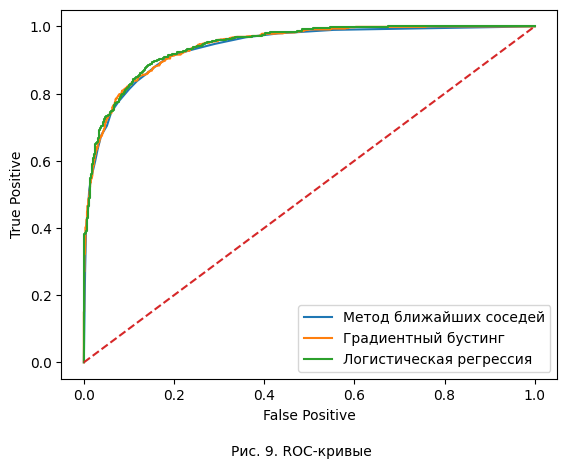

In [106]:
auc = dict()

for name, model in models1.items():
    pred_prob = model.predict_proba(features_test)[:, 1]
    fp, tp, _ = roc_curve(target_test, pred_prob)
    plt.plot(fp, tp, label=name)
    auc[name] = roc_auc_score(target_test, pred_prob)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()
plt.figtext(0.5, -0.05, 'Рис. 9. ROC-кривые', ha='center', fontsize=10)
plt.show()

##Матрица путаницы

In [107]:
# Вероятности предсказания для тестового набора
prob_knn2_test = knn2.predict_proba(features_test)[:, 1]
prob_gb2_test = gb2.predict_proba(features_test)[:, 1]
prob_logit2_test = logit2.predict_proba(features_test)[:, 1]

In [108]:
# Определение линейной функции прибыли
def profit_function(tp, fp, tn, fn, tp_profit=10, fp_cost=-1, tn_profit=5, fn_cost=-1):
    return tp * tp_profit - fp * fp_cost + tn * tn_profit - fn * fn_cost

In [109]:
# Вычисление прибыли для различных порогов
def compute_profits(probs, y_true, thresholds, profit_func):
    profits = []
    for threshold in thresholds:
        y_pred = (probs >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        profits.append(profit_func(tp, fp, tn, fn))
    return np.array(profits)

In [110]:
# Генерация диапазона порогов
thresholds = np.arange(0.0, 1.01, 0.01)

In [111]:
# Вычисление прибыли для каждой модели
profits_knn2 = compute_profits(prob_knn2_test, target_test, thresholds, profit_function)
profits_gb2 = compute_profits(prob_gb2_test, target_test, thresholds, profit_function)
profits_logit2 = compute_profits(prob_logit2_test, target_test, thresholds, profit_function)

In [112]:
# Оптимальные пороги, основанные на максимальной прибыли
optimal_threshold_knn2 = thresholds[np.argmax(profits_knn2)]
optimal_threshold_gb2 = thresholds[np.argmax(profits_gb2)]
optimal_threshold_logit2 = thresholds[np.argmax(profits_logit2)]

In [113]:
from sklearn.metrics import confusion_matrix
#Матрица для метода ближайших соседей

knn2_preds = prob_knn2_test > optimal_threshold_knn2

confusion_matrix(target_test, knn2_preds).ravel()

array([1155,  271,   69,  705])

In [114]:
# Матрица для gb
gb2_preds = prob_gb2_test > optimal_threshold_gb2

confusion_matrix(target_test, gb2_preds)

array([[1185,  241],
       [  84,  690]])

In [115]:
#Матрица для logit

logit2_preds = prob_logit2_test > optimal_threshold_logit2

confusion_matrix(target_test, logit2_preds)

array([[1204,  222],
       [  81,  693]])

In [116]:
# AUC для каждой модели
auc_knn2 = roc_auc_score(target_test, prob_knn2_test)
auc_gb2 = roc_auc_score(target_test, prob_gb2_test)
auc_logit2 = roc_auc_score(target_test, prob_logit2_test)

In [117]:
# Таблица результатов
results = pd.DataFrame({
    'Модель': ['knn2', 'gb2', 'logit2'],
    'AUC': [auc_knn2, auc_gb2, auc_logit2],
    'Максимальная прибыль': [np.max(profits_knn2), np.max(profits_gb2), np.max(profits_logit2)],
    'Оптимальный порог': [optimal_threshold_knn2, optimal_threshold_gb2, optimal_threshold_logit2]
})

# Вывод результатов
print(results)

   Модель       AUC  Максимальная прибыль  Оптимальный порог
0    knn2  0.938271                 13165               0.24
1     gb2  0.942986                 13150               0.29
2  logit2  0.945259                 13253               0.28


#Регрессия

In [122]:
# Отбор признаков, прогнозирующие ОПЖ (ожидаемую продолжительность жизни)
# Создание DataFrame
df1 = pd.DataFrame({
    'health': health,
    'city': city,
    'wage': wage,
    'disease': disease,
    'LE': LE
})

In [123]:
features = ['health', 'city', 'wage', 'disease']
X = df1[features]
y = df1['LE']

In [124]:
#Разделение данных на обучающую и тестовую выборки:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
features_train, features_test, target_train, target_test = X_train, X_test, y_train, y_test


In [125]:
# Функция для оценки моделей:

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(-scores).mean()

    return rmse_train, rmse_test, mape_train, mape_test, rmse_cv

In [126]:
# Начальные модели и их оценка:

initial_models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5, p=3),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, learning_rate=0.5, max_depth=2, random_state=123)
}

initial_results = {}
for name, model in initial_models.items():
    model.fit(features_train, target_train)
    rmse_train, rmse_test, mape_train, mape_test, rmse_cv = evaluate_model(model, features_train, target_train, features_test, target_test)
    initial_results[name] = {
        "Initial RMSE Train": rmse_train,
        "Initial RMSE Test": rmse_test,
        "Initial MAPE Train": mape_train,
        "Initial MAPE Test": mape_test,
        "Initial RMSE CV": rmse_cv
    }

initial_results_df = pd.DataFrame(initial_results).T
print("Initial Results:")
print(initial_results_df)

Initial Results:
                   Initial RMSE Train  Initial RMSE Test  Initial MAPE Train  \
Random Forest                1.172736           3.160839            0.012744   
KNN                          2.612255           3.163727            0.028624   
Gradient Boosting            2.842665           2.951985            0.030967   

                   Initial MAPE Test  Initial RMSE CV  
Random Forest               0.035197         3.148103  
KNN                         0.035369         3.193977  
Gradient Boosting           0.033059         2.965333  


##Тюнинг лучшей модели

In [138]:
# Проведем тюнинг градиентного бустинга с помощью GridSearchCV

hyperparameters_gb3 = {'learning_rate': [0.025, 0.1, 0.5],
'n_estimators': [50, 70, 200, 300],
'max_depth' : [2, 5] }

GSCV_gb3 = GridSearchCV(GradientBoostingRegressor(n_estimators=100),
                        param_grid=hyperparameters_gb3,
                        cv = 5,
                        scoring = 'neg_mean_squared_error')

GSCV_gb3.fit(X_train, y_train)

hp_gb3 = GSCV_gb3.best_params_
print(hp_gb3)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}


In [142]:
gb3 = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 2, n_estimators = 200)
rmse_train, rmse_test, mape_train, mape_test, rmse_cv = evaluate_model(gb3, features_train, target_train, features_test, target_test)

In [154]:
 tuned_results = pd.DataFrame({

        "RMSE Test": [rmse_test],
        "MAPE Test": [mape_test],
        "RMSE CV": [rmse_cv]
    })

print(tuned_results)

   RMSE Test  MAPE Test   RMSE CV
0   2.914135   0.032561  2.923173
